# Brazilian E-Commerce EDA & Customer Segmentation

## Table of Contents

1. **[About Dataset](#about_dataset)**  
2. **[Objective](#objective)**  
3. **[Importing Common Data Handling & Processing Libraries](#importing_common_libs)**  
4. **[Importing Data](#loading_data)**
5. **[Data Schema](#data_schema)**
6. **[Data Collation](#data_collation)**
7. **[Data Overview](#data_overview)**
    - 7.1 - [Dataframe Metadata](#df_metadata)
    - 7.2 - [Re-Assigning Appropriate Datatypes](#datatype_reassignment)
    - 7.3 - [Fixing Feature Names](#fixing_spellings)
    - 7.4 - [Re-Checking Feature Names & Datatypes](#reviewing_metadata)
    - 7.5 - [Checking Shape of Data](#df_shape)
8. **[Missing Value Analysis](#missing_value_analysis)**
    - 8.1 - [Missing Values Check](#missing_values_check)
    - 8.2 - [Missing Values Removal](#missing_values_removal)
    - 8.3 - [Missing Values Recheck](#missing_values_recheck)
    - 8.4 - [Data Shape Recheck](#df_shape_recheck)
9. **[Data Summary](#data_summary)**
    - 9.1 - [Summarizing Numerical Data](#summary_numerical_data)
    - 9.2 - [Summarizing Categorical Data](#summary_categorical_data)
10. **[Exploratory Data Analysis (EDA)](#EDA)**
    - 10.1 - [Importing Data Visualization Libraries](#importing_dataviz_libs)
    - 10.2 - [Which cities are generating the highest orders?](#cities_most_orders)
    - 10.3 - [Which cities are generating the most revenue?](#cities_most_revenue)
    - 10.4 - [What are the peak order timings?](#peak_order_timings)
    - 10.5 - [What are the peak order days?](#peak_order_days)
    - 10.6 - [What are the best and the worst performing product categories in terms of number of orders?](#prodCat_orders)
    - 10.7 - [What are the best and the worst performing product categories in terms of total revenue generated?](#prodCat_revenue)
    - 10.8 - [What are the best and the worst performing product categories in terms of review scores?](#prodCat_reviews)
    - 10.9 - [What are the most popular payment methods?](#popular_payment_methods)
    - 10.10 - [How long does it take for the products to be delivered?](#delivery_times)
    - 10.11 - [Do longer delivery times lead to poor review scores?](#deliveryTime_review_relation)
11. **[RFM](#RFM)**
    - 11.1 - [What is RFM Analysis?](#RFM_intro)
    - 11.2 - [Calculating Recency](#calc_recency)
    - 11.3 - [Calculating Frequency](#calc_frequency)
    - 11.4 - [Calculating Monetary](#calc_monetary)
    - 11.5 - [Final RFM Table](#final_RFM_table)
12. **[K-Means Clustering](#k_means_clustering)**
    - 12.1 - [What is K-Means Clustering?](#k_means_clustering_intro)
    - 12.1 - [Skewness Check](#skewness_check)
    - 12.2 - [Data Transformation](#data_transformation)
    - 12.3 - [Skewness Recheck](#skewness_recheck)
    - 12.4 - [Data Scaling](#data_scaling)
    - 12.5 - [K-Means Clustering](#clustering)
    - 12.6 - [Silhouette Score](#silhouette_score)
    - 12.7 - [Final K-Means Model](#final_model)
13. **[Cluster Exploration](#cluster_exploration)**
    - 13.1 - [Assigning Clusters to Customers](#cluster_assignment)
    - 13.2 - [How many customers are present in each cluster?](#cluster_sizes)
    - 13.3 - [What's the average spending of customers in each cluster?](#cluster_monetary)
    - 13.4 - [On average, how many days have passed since the customer's last order in each cluster?](#cluster_recency)
    - 13.5 - [On average, how many orders have the customers placed in each cluster?](#cluster_frequency)
    - 13.6 - [Aggregating RFM Data](#aggregate_RFM)
    - 13.7 - [What does each cluster represent?](#cluster_interpretations)

<a id='about_dataset'></a>
## About Dataset:
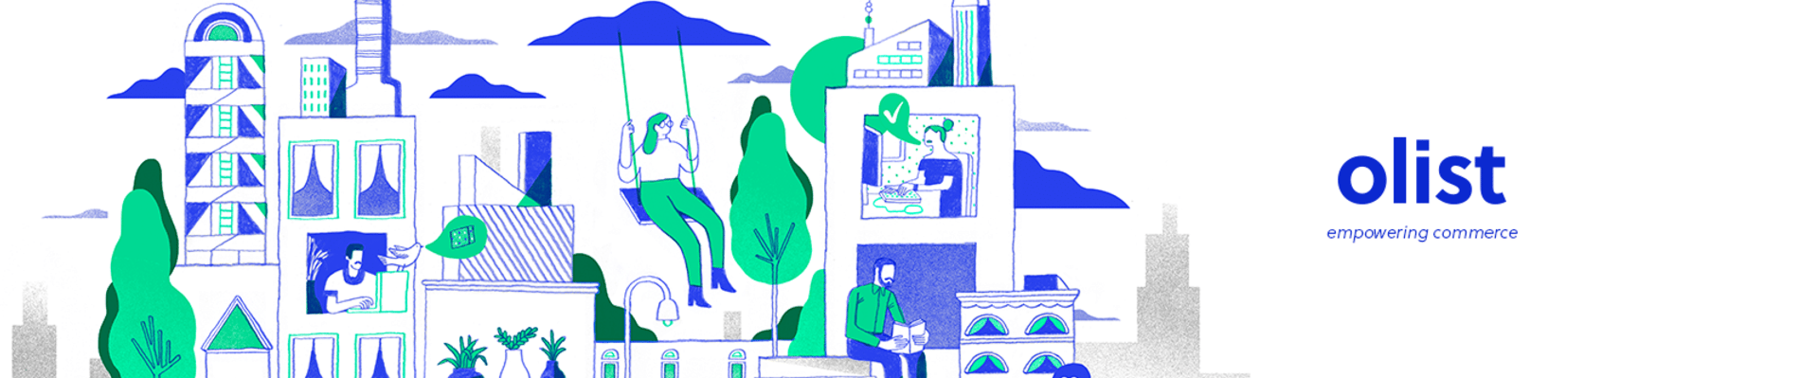

This project uses a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

<a id='objective'></a>
## Objective:

There are two major objectives of this project:
1. Visually explore the data to derive meaningful insights **(Exploratory Data Analysis (EDA))**.
2. Derive Recency, Frequency and Monetary (RFM) data and perform clustering on it **(Customer Segmentation)**. 

<a id='importing_common_libs'></a>
## Importing common data handling and processing libraries:

In [1]:
import numpy as np
import pandas as pd

<a id='loading_data'></a>
## Importing all the datasets and viewing them:

In [2]:
import os
os.chdir(r"C:\Vishnu Vardhan\CS\Data Science\Imarticus Data Analytics & ML\Projects\Brazilian E-Commerce\Datasets")

In [3]:
pd.set_option('display.max_columns', None)

**Customers Dataset: This dataset has information about the customer and their location.**

In [4]:
customers = pd.read_csv("olist_customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Orders Dataset: This is the core dataset. It contains the order information.**

In [5]:
orders = pd.read_csv("olist_orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Order Items Dataset: This dataset contains information about the items purchased within each order.**

In [6]:
items = pd.read_csv("olist_order_items_dataset.csv")
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Payments Dataset: This dataset contains information about the payment method(s) used for each order. There can be multiple payment methods and separate payment installations for each order.**

In [7]:
payments = pd.read_csv("olist_order_payments_dataset.csv")
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Reviews Dataset: This dataset contains the reviews written by the customer for each order.**

In [8]:
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Geolocation Dataset: This dataset contains the Brazilian zip codes and the latitude/longitude coordinates present within the area represented by the zip-code.**

In [9]:
geolocations = pd.read_csv("olist_geolocation_dataset.csv")
geolocations.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Sellers Dataset: This dataset contains information about the sellers and their location.**

In [10]:
sellers = pd.read_csv("olist_sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Products Dataset: This dataset contains information about every product available on olist.com .**

In [11]:
products = pd.read_csv("olist_products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Product Category Name Translations Dataset: This dataset contains translations of each product category (listed in Portuguese) in English.**

In [12]:
name_translations = pd.read_csv("product_category_name_translation.csv")
name_translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


<a id='data_schema'></a>
## Data Schema:
**This schema represents how the different datasets are connected to each other through common keys.**
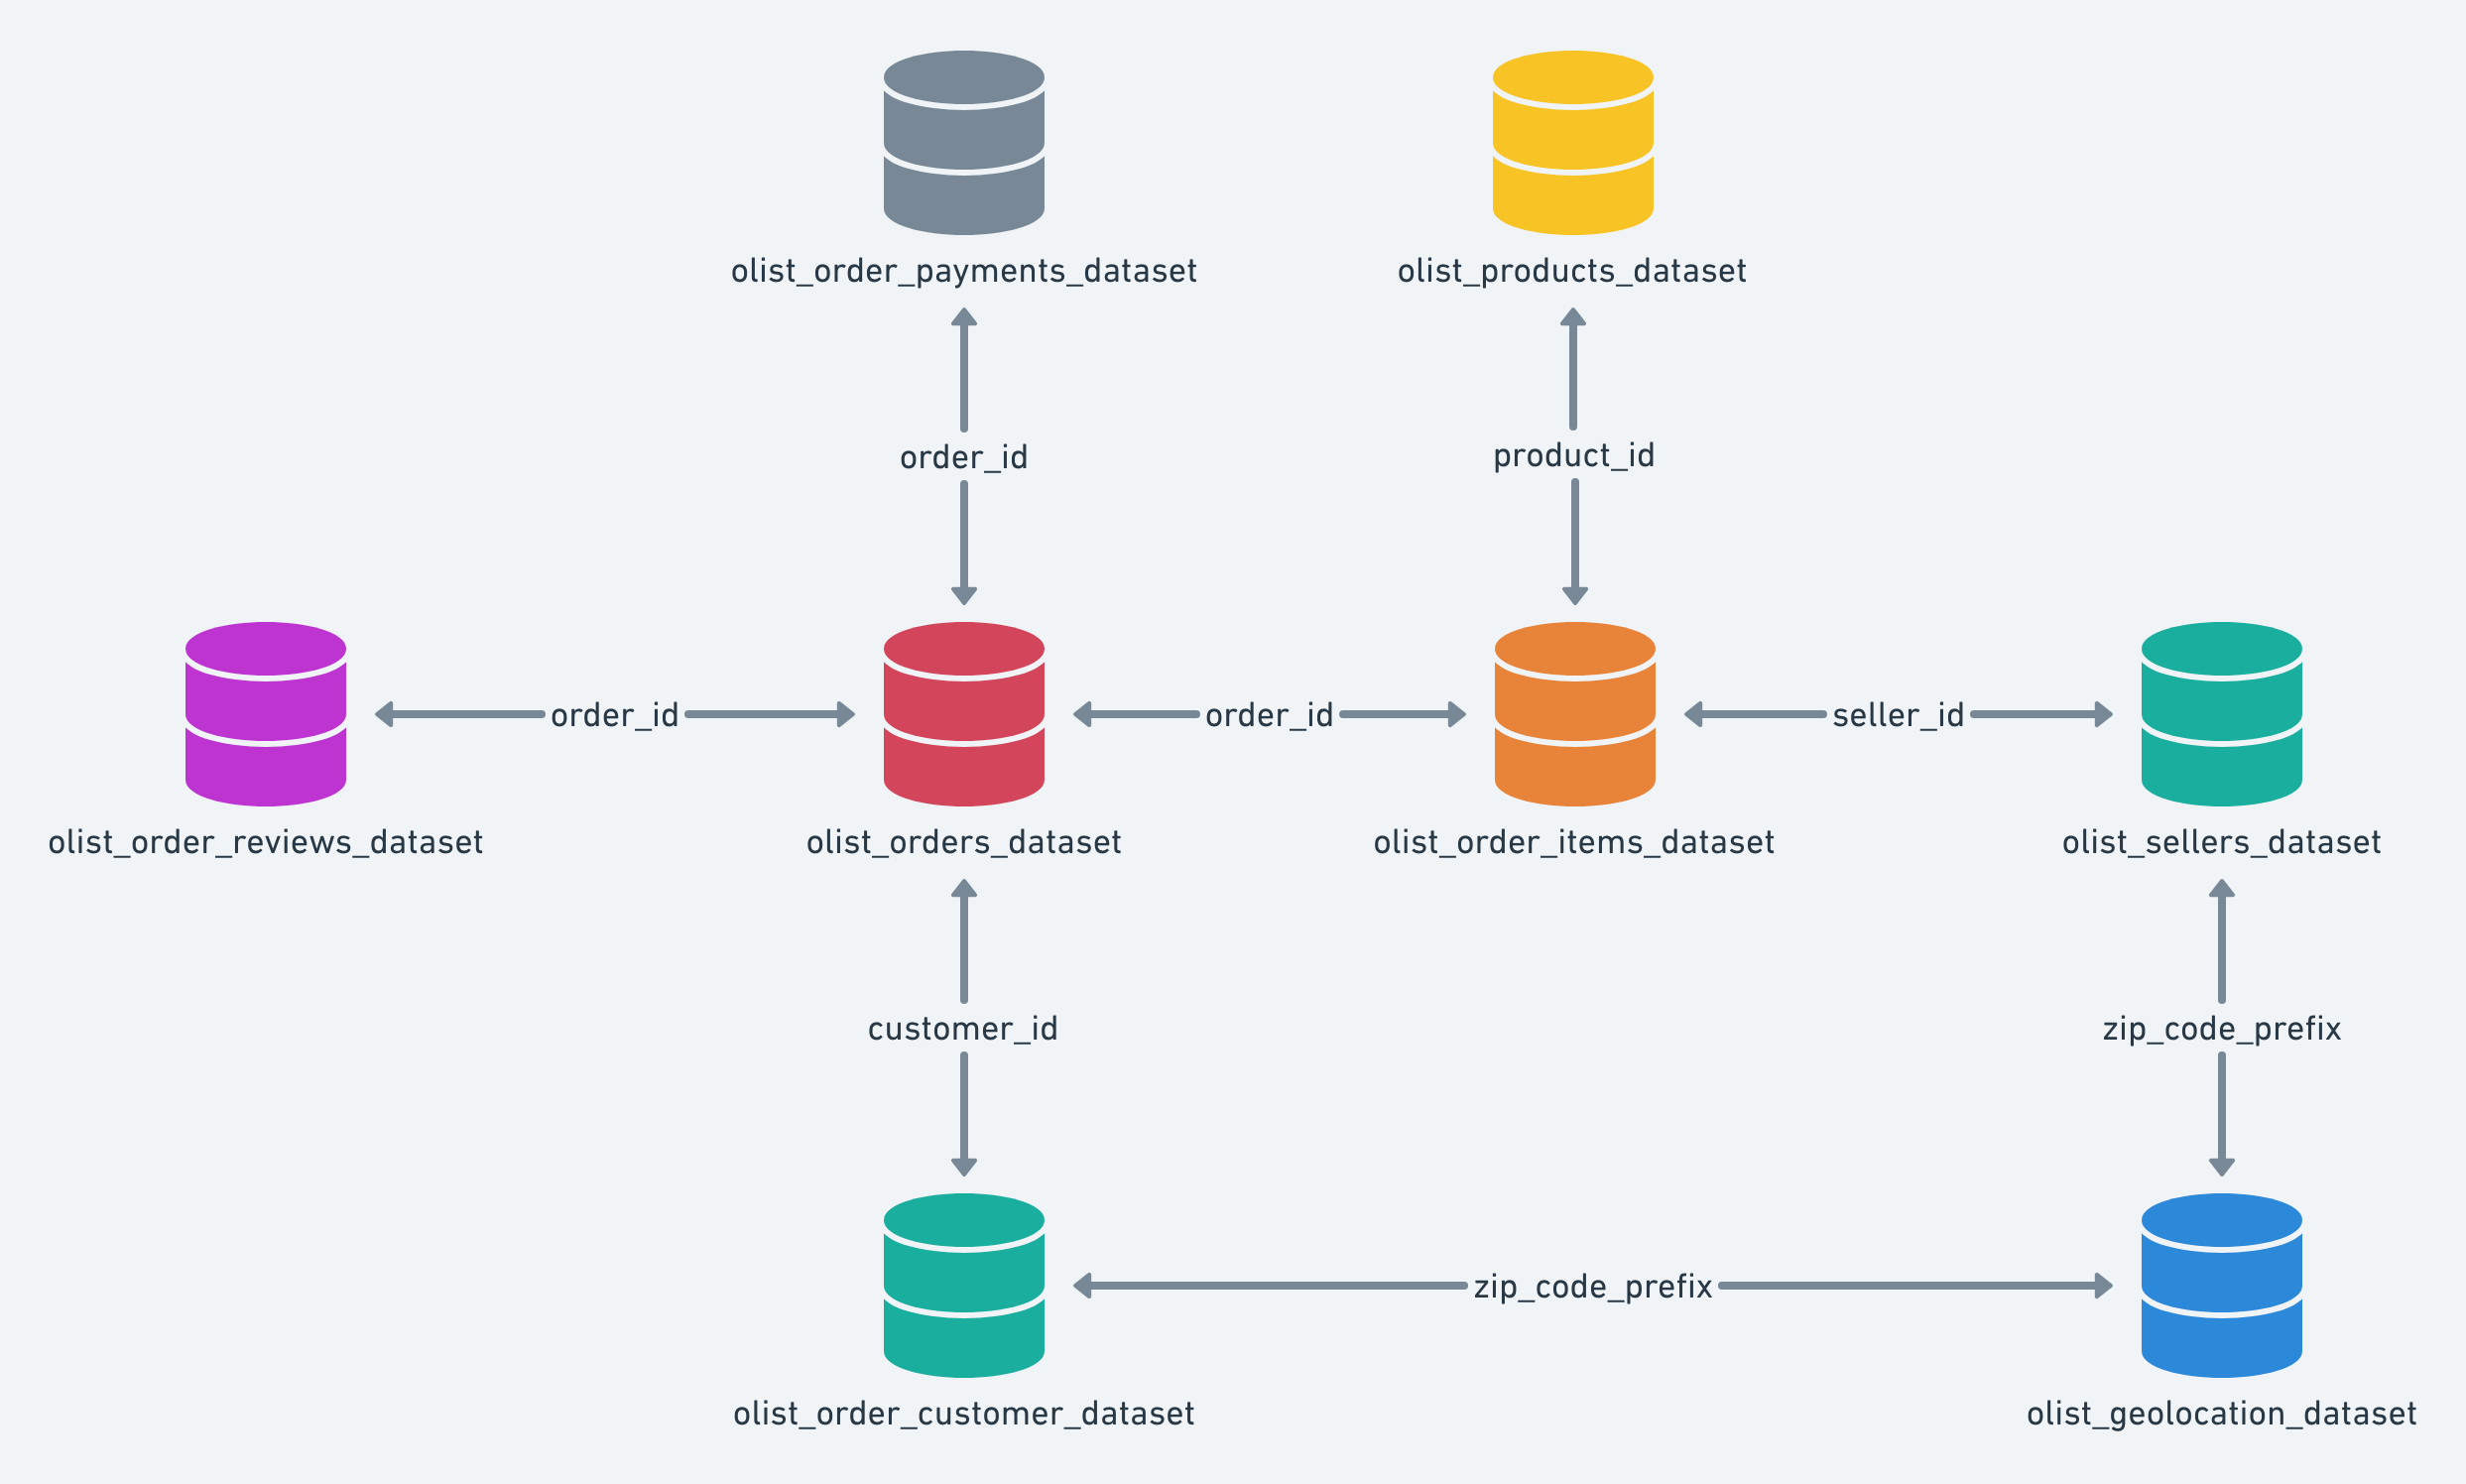

<a id='data_collation'></a>
## Collating all the datasets:
*(except geolocation data)*

In [13]:
#Merging the datasets on common keys as shown in the above data schema.
data = customers.merge(orders, on = 'customer_id') \
                .merge(items, on = 'order_id') \
                .merge(payments, on = 'order_id') \
                .merge(reviews, on = 'order_id') \
                .merge(products, on = 'product_id') \
                .merge(name_translations, on = 'product_category_name') \
                .merge(sellers, on = 'seller_id')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,1,credit_card,7,140.61,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,1,credit_card,10,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP


**We notice that there are duplicate OrderIDs. This is because of one or both of the following reasons:  
    1. Each order can contain multiple order items.  
    2. Each order can be paid through multiple payment sources.**

<a id='data_overview'></a>
## Overview of the data:

<a id='df_metadata'></a>
### Dataframe metadata:

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  order_item_id                 

<a id='datatype_reassignment'></a>
### Re-assigning appropriate datatypes to some of the features:

In [15]:
#Assigning object datatype for the zipcodes:
for feature in ['customer_zip_code_prefix', 'seller_zip_code_prefix']:
    data[feature] = data[feature].astype('object')

#Assigning datetime datatype for the timestamps:
for feature in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date',
                'review_creation_date', 'review_answer_timestamp']:
    data[feature] = pd.to_datetime(data[feature], errors = 'raise', utc = False)

<a id='fixing_spellings'></a>
### Renaming misspelled feature names:

In [16]:
data.rename(columns = {'product_name_lenght':'product_name_length', 
                       'product_description_lenght':'product_description_length'}, inplace = True)

<a id='reviewing_metadata'></a>
### Re-checking feature names and corresponding datatypes:

In [17]:
data.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                 object
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                        int64
payment_type                             object
payment_installments                    

**All features now have correct spelling and appropriate datatypes.**

<a id='df_shape'></a>
### Checking the shape of the dataframe (number of rows and columns):

In [18]:
data.shape

(115609, 40)

**There are 115,609 rows and 40 columns.**

<a id='missing_value_analysis'></a>
## Missing Value Analysis:

<a id='missing_values_check'></a>
### Checking for missing values:

In [19]:
Total = data.isnull().sum().sort_values(ascending = False)          
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
review_comment_title,101808,88.062348
review_comment_message,66703,57.697065
order_delivered_customer_date,2400,2.075963
order_delivered_carrier_date,1195,1.033657
order_approved_at,14,0.012110
product_width_cm,1,0.000865
product_height_cm,1,0.000865
product_length_cm,1,0.000865
product_weight_g,1,0.000865
product_name_length,0,0.000000


**We see that 100% of the data is present for most of the important features and the missing data is mostly due to customers choosing not to leave a review for the products they purchased and some failed deliveries.**

<a id='missing_values_removal'></a>
### Removing missing values:

**Dropping the features with high percentage of missing values:**

In [20]:
data.drop(['review_comment_title', 'review_comment_message'], axis = 1, inplace = True)

**Removing the rows that contain missing values for features that contain low percentage of missing values:**

In [21]:
data.dropna(axis = 0, inplace = True)

<a id='missing_values_recheck'></a>
### Re-checking for missing values:

In [22]:
Total = data.isnull().sum().sort_values(ascending = False)          
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
customer_id,0,0.0
product_description_length,0,0.0
payment_value,0,0.0
review_id,0,0.0
review_score,0,0.0
review_creation_date,0,0.0
review_answer_timestamp,0,0.0
product_category_name,0,0.0
product_name_length,0,0.0
product_photos_qty,0,0.0


**All NULL values have now been eliminated.**

<a id='df_shape_recheck'></a>
### Re-checking the shape of the data:

In [23]:
data.shape

(113193, 38)

**There are 113,193 rows and 38 columns. Only 2,416 (or 2.08%) rows less than the number of rows before NULL values elimination.**

<a id='data_summary'></a>
## Summarizing the data:

<a id='summary_numerical_data'></a>
### Summary of the numerical features of the data:

In [24]:
data.describe(datetime_is_numeric = True).T

,count,mean,min,25%,50%,75%,max,std
order_purchase_timestamp,113193,2018-01-01 07:46:22.707817728,2016-10-03 09:44:50,2017-09-13 14:12:25,2018-01-20 09:22:45,2018-05-05 13:57:15,2018-08-29 15:00:37,NaN
order_approved_at,113193,2018-01-01 18:12:25.359050496,2016-10-04 09:43:32,2017-09-13 22:05:44,2018-01-20 16:00:33,2018-05-05 19:50:47,2018-08-29 15:10:26,NaN
order_delivered_carrier_date,113193,2018-01-04 14:19:54.360985088,2016-10-08 10:34:01,2017-09-15 20:07:55,2018-01-24 00:23:35,2018-05-08 14:07:00,2018-09-11 19:48:28,NaN
order_delivered_customer_date,113193,2018-01-13 18:22:26.739418624,2016-10-11 13:46:32,2017-09-25 18:34:40,2018-02-02 02:15:19,2018-05-15 20:02:55,2018-10-17 13:22:46,NaN
order_estimated_delivery_date,113193,2018-01-25 03:50:01.955951616,2016-10-27 00:00:00,2017-10-04 00:00:00,2018-02-16 00:00:00,2018-05-28 00:00:00,2018-10-25 00:00:00,NaN
order_item_id,113193.0,1.195065,1.0,1.0,1.0,1.0,21.0,0.687526
shipping_limit_date,113193,2018-01-07 22:21:08.998048,2016-10-08 10:34:01,2017-09-20 13:24:55,2018-01-26 14:14:20,2018-05-10 19:15:24,2020-04-09 22:35:08,NaN
price,113193.0,119.84665,0.85,39.9,74.9,132.98,6735.0,181.079901
freight_value,113193.0,20.002595,0.0,13.08,16.32,21.19,409.68,15.711728
payment_sequential,113193.0,1.090818,1.0,1.0,1.0,1.0,26.0,0.686674


<a id='summary_categorical_data'></a>
### Summary of the categorical features of the data:

In [25]:
data.describe(include = 'object').T

,count,unique,top,freq
customer_id,113193,94471,270c23a11d024a44c896d1894b261a83,63
customer_unique_id,113193,91465,9a736b248f67d166d2fbb006bcb877c3,75
customer_zip_code_prefix,113193,14825,24220,150
customer_city,113193,4071,sao paulo,17871
customer_state,113193,27,SP,47812
order_id,113193,94471,895ab968e7bb0d5659d16cd74cd1650c,63
order_status,113193,2,delivered,113186
product_id,113193,31474,aca2eb7d00ea1a7b8ebd4e68314663af,526
seller_id,113193,2907,4a3ca9315b744ce9f8e9374361493884,2093
payment_type,113193,4,credit_card,83534


<a id='EDA'></a>
## Exploratory Data Analysis:

<a id='importing_dataviz_libs'></a>
### Importing data visualisation libraries:

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

<a id='cities_most_orders'></a>
### Which cities are generating the highest orders?

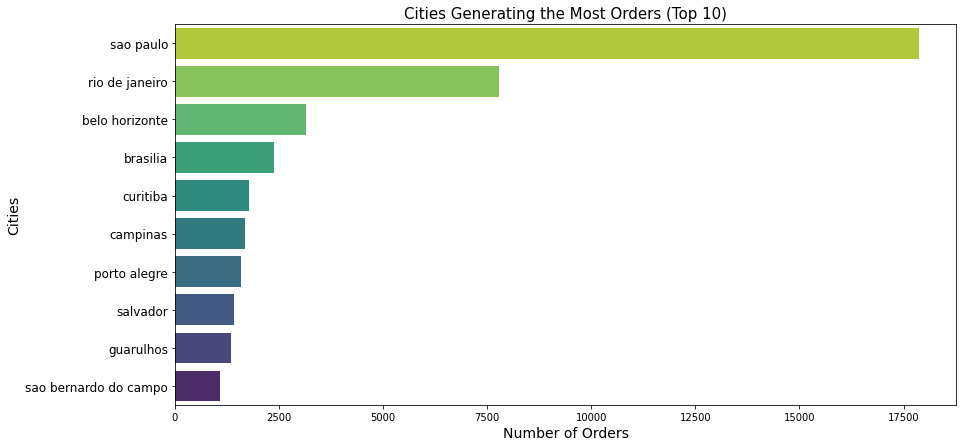

In [27]:
top_orders_cities = data.groupby("customer_city")["order_id"].count().reset_index().sort_values("order_id", ascending = False)
plt.figure(figsize = (14, 7))
sns.barplot(x = "order_id", y = "customer_city", data = top_orders_cities[:10], palette = 'viridis_r')
plt.xlabel("Number of Orders", fontsize = 14)
plt.ylabel("Cities", fontsize = 14)
plt.yticks(fontsize = 12)
plt.title("Cities Generating the Most Orders (Top 10)", fontsize = 15)
plt.show()

**We can clearly see that most of the orders are coming from Brazil's biggest metropolitan cities - Sao Paulo and Rio de Janerio**

<a id='cities_most_revenue'></a>
### Which cities are generating the most revenue?

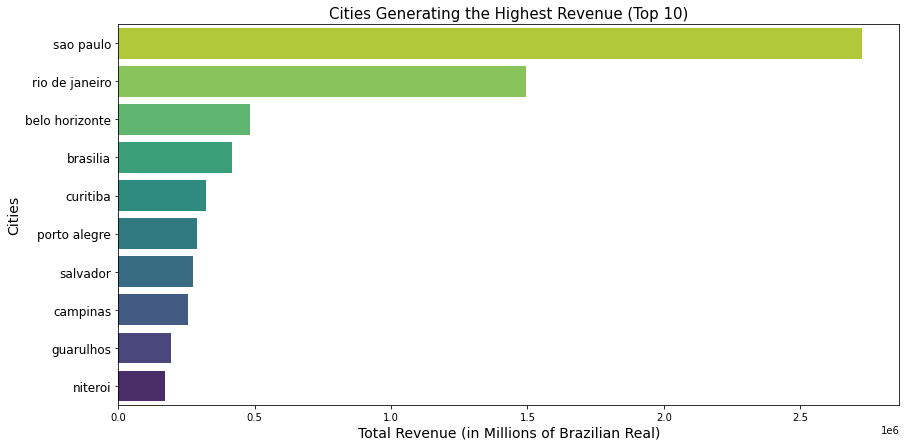

In [28]:
top_revenue_cities = data.groupby("customer_city")["payment_value"].sum().reset_index().sort_values("payment_value", ascending = False)
plt.figure(figsize = (14, 7))
sns.barplot(x = "payment_value", y = "customer_city", data = top_revenue_cities[:10], palette = 'viridis_r')
plt.xlabel("Total Revenue (in Millions of Brazilian Real)", fontsize = 14)
plt.ylabel("Cities", fontsize = 14)
plt.yticks(fontsize = 12)
plt.title("Cities Generating the Highest Revenue (Top 10)", fontsize = 15)
plt.show()

**As expected, the cities that generated the most orders, also generated the most revenue.**

<a id='peak_order_timings'></a>
### What are the peak order timings?

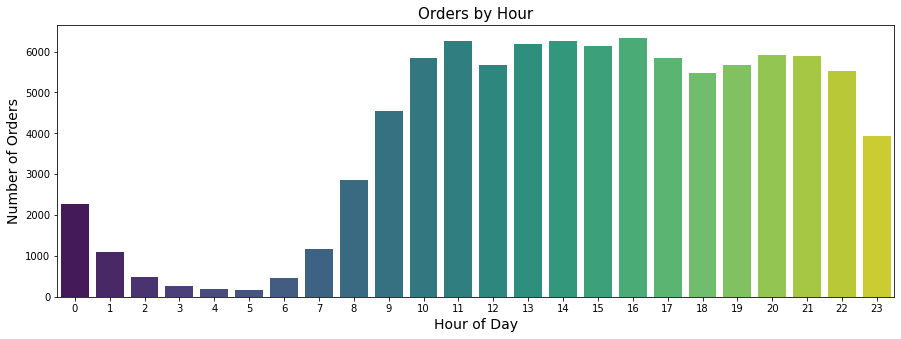

In [29]:
orders_byHour = data.groupby(data.order_purchase_timestamp.dt.hour)['order_id'].nunique().reset_index()
plt.figure(figsize = (15, 5))
sns.barplot(x = 'order_purchase_timestamp', y = 'order_id', data = orders_byHour, palette = 'viridis')
plt.xlabel("Hour of Day", fontsize = 14)
plt.ylabel("Number of Orders", fontsize = 14)
plt.title("Orders by Hour", fontsize = 15)
plt.show()

**It is clear that the peak hours are between 10AM to 10PM**

<a id='peak_order_days'></a>
### What are the peak order days?

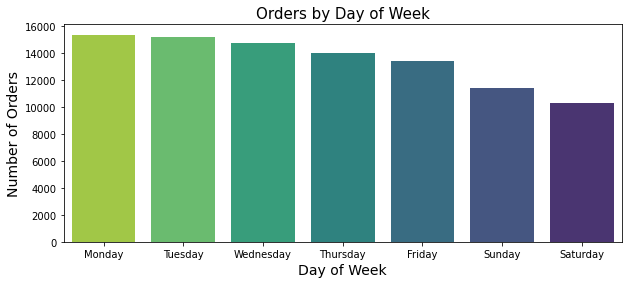

In [30]:
orders_byDays = data.groupby(data.order_purchase_timestamp.dt.day_name())['order_id'].nunique().reset_index().sort_values('order_id', ascending = False)
plt.figure(figsize = (10, 4))
sns.barplot(x = 'order_purchase_timestamp', y = 'order_id', data = orders_byDays, palette = 'viridis_r')
plt.xlabel("Day of Week", fontsize = 14)
plt.ylabel("Number of Orders", fontsize = 14)
plt.title("Orders by Day of Week", fontsize = 15)
plt.show()

**The orders placed seem to decline through the week with the exception of Saturday generating lesser orders than Sunday.**

<a id='prodCat_orders'></a>
### What are the best and the worst performing product categories in terms of number of orders?

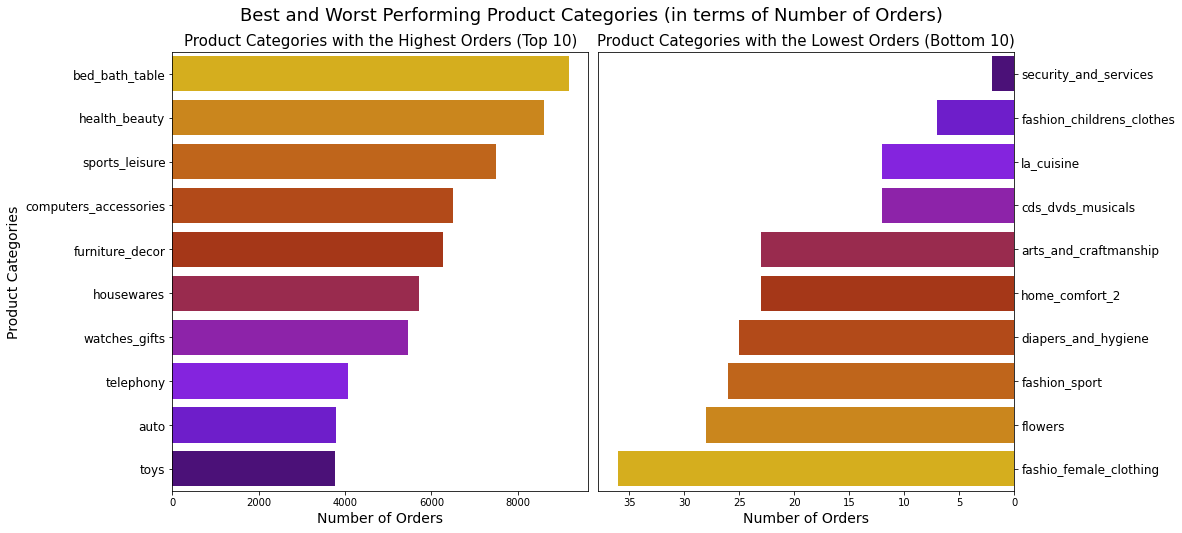

In [31]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16.5, 7.5))

prodCat_TopOrders = data.groupby(data['product_category_name_english'])['order_id'].nunique().reset_index().sort_values('order_id', ascending = False)
sns.barplot(x = 'order_id', y = 'product_category_name_english', data = prodCat_TopOrders[:10], palette = 'gnuplot_r', ax = ax[0])
ax[0].set_xlabel("Number of Orders", fontsize = 14)
ax[0].set_ylabel("Product Categories", fontsize = 14)
ax[0].tick_params(axis = 'y', labelsize = 12)
ax[0].set_title("Product Categories with the Highest Orders (Top 10)", fontsize = 15)

prodCat_BotOrders = data.groupby(data['product_category_name_english'])['order_id'].nunique().reset_index().sort_values('order_id', ascending = True)
sns.barplot(x = 'order_id', y = 'product_category_name_english', data = prodCat_BotOrders[:10], palette = 'gnuplot', ax = ax[1])
ax[1].set_xlabel("Number of Orders", fontsize = 14)
ax[1].set_ylabel("")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis = 'y', labelsize = 12)
ax[1].set_title("Product Categories with the Lowest Orders (Bottom 10)", fontsize = 15)

plt.suptitle("Best and Worst Performing Product Categories (in terms of Number of Orders)", fontsize = 18)
plt.tight_layout(pad = 1)
plt.show()

<a id='prodCat_revenue'></a>
### What are the best and the worst performing product categories in terms of total revenue generated?

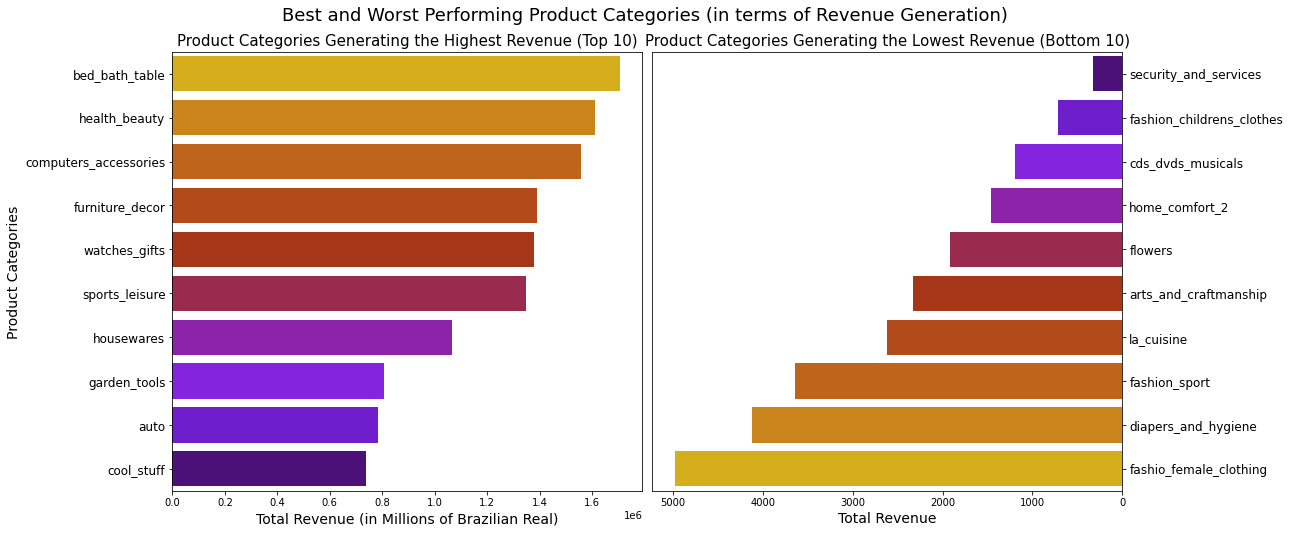

In [32]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7.5))

prodCat_TopRevenue = data.groupby(data['product_category_name_english'])['payment_value'].sum().reset_index().sort_values('payment_value', ascending = False)
sns.barplot(x = 'payment_value', y = 'product_category_name_english', data = prodCat_TopRevenue[:10], palette = 'gnuplot_r', ax = ax[0])
ax[0].set_xlabel("Total Revenue (in Millions of Brazilian Real)", fontsize = 14)
ax[0].set_ylabel("Product Categories", fontsize = 14)
ax[0].tick_params(axis = 'y', labelsize = 12)
ax[0].set_title("Product Categories Generating the Highest Revenue (Top 10)", fontsize = 15)

prodCat_BotRevenue = data.groupby(data['product_category_name_english'])['payment_value'].sum().reset_index().sort_values('payment_value', ascending = True)
sns.barplot(x = 'payment_value', y = 'product_category_name_english', data = prodCat_BotRevenue[:10], palette = 'gnuplot', ax = ax[1])
ax[1].set_xlabel("Total Revenue", fontsize = 14)
ax[1].set_ylabel("")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis = 'y', labelsize = 12)
ax[1].set_title("Product Categories Generating the Lowest Revenue (Bottom 10)", fontsize = 15)

plt.suptitle("Best and Worst Performing Product Categories (in terms of Revenue Generation)", fontsize = 18)
plt.tight_layout(pad = 1)
plt.show()

<a id='prodCat_reviews'></a>
### What are the best and the worst performing product categories in terms of review scores?

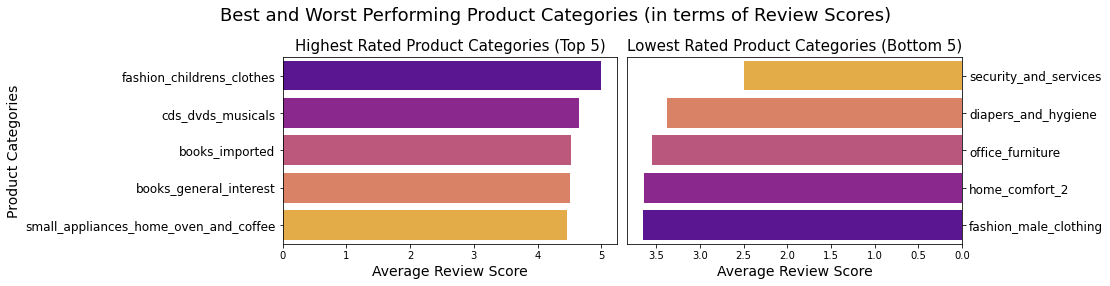

In [33]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15.5, 4))

prodCat_TopReview = data.groupby(data['product_category_name_english'])['review_score'].mean().reset_index().sort_values('review_score', ascending = False)
sns.barplot(x = 'review_score', y = 'product_category_name_english', data = prodCat_TopReview[:5], palette = 'plasma', ax = ax[0])
ax[0].set_xlabel("Average Review Score", fontsize = 14)
ax[0].set_ylabel("Product Categories", fontsize = 14)
ax[0].tick_params(axis = 'y', labelsize = 12)
ax[0].set_title("Highest Rated Product Categories (Top 5)", fontsize = 15)

prodCat_BotReview = data.groupby(data['product_category_name_english'])['review_score'].mean().reset_index().sort_values('review_score', ascending = True)
sns.barplot(x = 'review_score', y = 'product_category_name_english', data = prodCat_BotReview[:5], palette = 'plasma_r', ax = ax[1])
ax[1].set_xlabel("Average Review Score", fontsize = 14)
ax[1].set_ylabel("")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis = 'y', labelsize = 12)
ax[1].set_title("Lowest Rated Product Categories (Bottom 5)", fontsize = 15)

plt.suptitle("Best and Worst Performing Product Categories (in terms of Review Scores)", fontsize = 18)
plt.tight_layout(pad = 1)
plt.show()

<a id='popular_payment_methods'></a>
### What are the most popular payment methods?

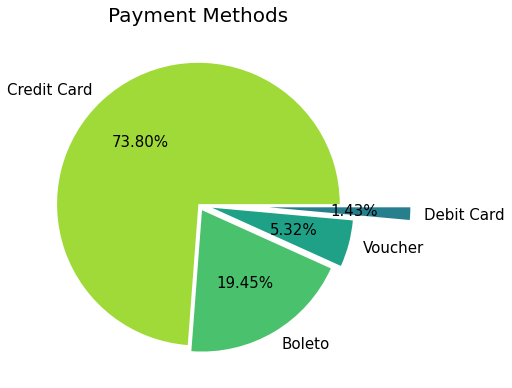

In [34]:
plt.figure(figsize = (10, 6.5))
payment_type_counts = data.payment_type.value_counts()
plt.pie(x = payment_type_counts.to_list(), labels = ['Credit Card', 'Boleto', 'Voucher', 'Debit Card'], 
        autopct = '%1.2f%%', explode = (0, 0.05, 0.1, 0.5), colors = sns.color_palette('viridis_r'), 
        textprops = {'fontsize': 15})
plt.title("Payment Methods", fontsize = 20)
plt.show()

**Credit Cards are by far the most popular payment method used for more than 70% of all orders followed by Boletos being used for almost 20% of all orders. Debit Card is the least popular payment method being used for less than 2% of all orders.**

<a id='delivery_times'></a>
### How long does it take for the products to be delivered?

In [35]:
#Calculating delivery time for all orders:
deliveryTime = (data["order_delivered_customer_date"] - data["order_purchase_timestamp"])
deliveryTime_Seconds = deliveryTime.apply(lambda x: x.total_seconds())
data['deliveryTime_Days'] = round(deliveryTime_Seconds/86400, 2)

#Summarizing the delivery time:
data['deliveryTime_Days'].describe()

count    113193.000000
mean         12.441694
std           9.355858
min           0.530000
25%           6.740000
50%          10.190000
75%          15.500000
max         208.350000
Name: deliveryTime_Days, dtype: float64

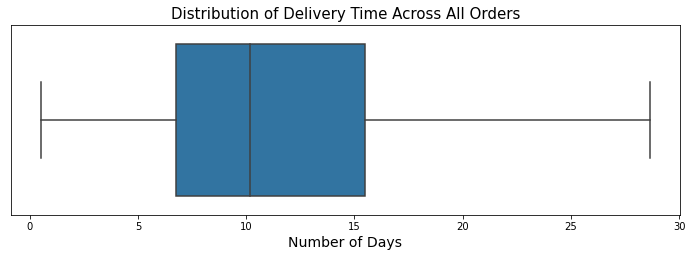

In [36]:
#Plotting the boxplot for the delivery time (excluding the outliers):
plt.figure(figsize = (12, 3.5))
sns.boxplot(data.deliveryTime_Days, orient = 'h', showfliers = False)
plt.xlabel("Number of Days", fontsize = 14)
plt.yticks([])
plt.title('Distribution of Delivery Time Across All Orders', fontsize = 15)
plt.show()

**On average, it takes 7-16 days for an order to be delivered.**

<a id='deliveryTime_review_relation'></a>
### Do longer delivery times lead to poor review scores?

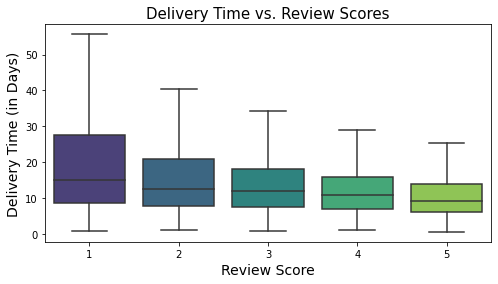

In [37]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = "review_score", y = "deliveryTime_Days", data = data, showfliers = False, palette = 'viridis')
plt.xlabel("Review Score", fontsize = 14)
plt.ylabel("Delivery Time (in Days)", fontsize = 14)
plt.title("Delivery Time vs. Review Scores", fontsize = 15)
plt.show()

**It appears that there's a slight correlation between delivery times and review scores. The longer it takes for an order to be delivered, the more likely it is to receive a low review score.**

<a id='RFM'></a>
## RFM Analysis:

<a id='RFM_intro'></a>
### What is RFM Analysis?

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

Recency: How recently has the customer made a transaction?

Frequency: How frequently does the customer place an order?

Monetary: How much money has the customer spent on products from this website/app?

<a id='calc_recency'></a>
### Calculating Recency:

In [38]:
#Grouping the data by Customer Unique ID to find the latest order of each customer:
df_recency = data.groupby(by = 'customer_unique_id', as_index = False)['order_purchase_timestamp'].max()

#Renaming the column:
df_recency.rename(columns = {"order_purchase_timestamp": "LastPurchaseDate"}, inplace = True)

#Removing time and extracting only date from the datetime field:
df_recency["LastPurchaseDate"] = df_recency["LastPurchaseDate"].dt.date

#Using the last order in the entire dataset as a reference point to calculate recency:
recent_date = data['order_purchase_timestamp'].dt.date.max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

df_recency.head()

,customer_unique_id,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,114
2,0000f46a3911fa3c0805444483337064,2017-03-10,537
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,321
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,288


<a id='calc_frequency'></a>
### Calculating Frequency:

In [39]:
#Grouping the data by Customer Unique ID to calculate the number of unique Order IDs for every customer.
frequency_df = data.groupby(["customer_unique_id"]).agg({"order_id": "nunique"}).reset_index()

#Renaming the column:
frequency_df.rename(columns = {"order_id": "Frequency"}, inplace = True)

frequency_df.head()

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


<a id='calc_monetary'></a>
### Calculating Monetary:

In [40]:
#Grouping the data by Customer Unique ID to calulcate the total spending of every customer.
monetary_df = data.groupby('customer_unique_id', as_index = False)['payment_value'].sum()

#Renaming the column:
monetary_df.rename(columns = {"payment_value": "Monetary"}, inplace = True)

monetary_df.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


<a id='final_RFM_table'></a>
### Merging the Recency, Frequency and Monetary dataframes:

In [41]:
rfm = df_recency.merge(frequency_df, on = 'customer_unique_id') \
                .merge(monetary_df, on = 'customer_unique_id')

#Dropping the 'Last Purchase Date' column:
rfm.drop('LastPurchaseDate', axis = 1, inplace = True)

rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


<a id='k_means_clustering'></a>
## K-Means Clustering:

<a id='k_means_clustering_intro'></a>
### What is K-Means Clustering?

**K-means clustering is an unsupervised learning algorithm that aims to partition n observations into K clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. K-means clustering minimizes within-cluster variances (squared Euclidean distances) and maximises inter-cluster variances.**

<a id='skewness_check'></a>
### Before performing K-Means Clustering, we must ensure that none of the features have a skewed distribution.

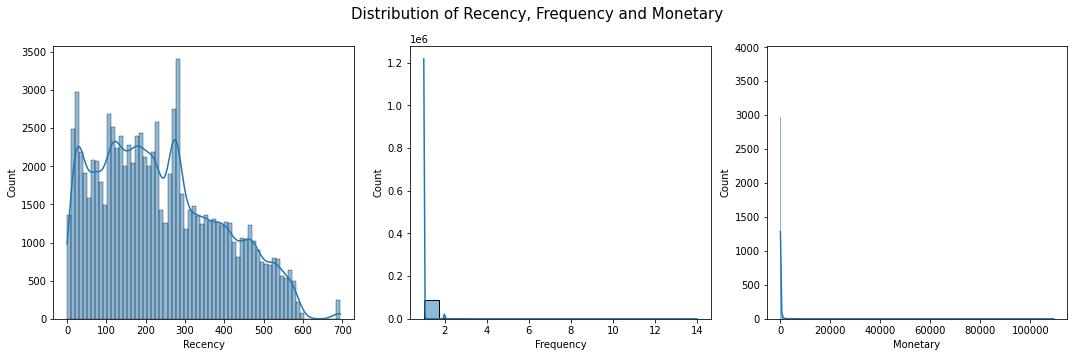

In [42]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
sns.histplot(rfm['Recency'], kde = True, ax = ax[0])
sns.histplot(rfm['Frequency'], kde = True, ax = ax[1])
sns.histplot(rfm['Monetary'], kde = True, ax = ax[2])
plt.suptitle('Distribution of Recency, Frequency and Monetary', fontsize = 15)
plt.tight_layout(pad = 1)
plt.show()

**We notice that Recency has a slightly even distribution but Frequency and Monetary are extremely right-skewed.  
To fix this, we can apply log or n<sup>th</sup> root transformation on the data.**

<a id='data_transformation'></a>
### In our case, we will apply n<sup>th</sup> root transformation on the data as log transform can produce 'undefined' values when transforming 0 (zero) values.

In [43]:
rfm_transformed = rfm.copy()
for feature in rfm.columns[2:]:
    rfm_transformed[feature] = rfm_transformed[feature].apply(lambda x: np.power(x, (1/10)))  #10th root

<a id='skewness_recheck'></a>
### Re-checking the feature distributions for presence of skewness:

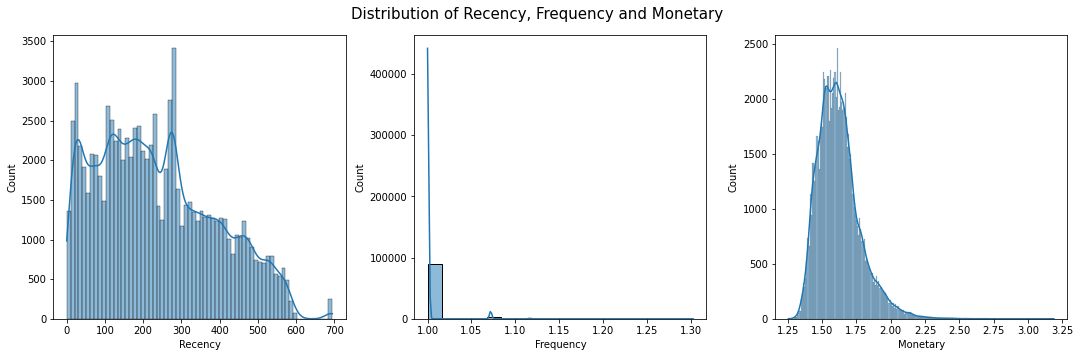

In [44]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
sns.histplot(rfm_transformed['Recency'], kde = True, ax = ax[0])
sns.histplot(rfm_transformed['Frequency'], kde = True, ax = ax[1])
sns.histplot(rfm_transformed['Monetary'], kde = True, ax = ax[2])
plt.suptitle('Distribution of Recency, Frequency and Monetary', fontsize = 15)
plt.tight_layout(pad = 1)
plt.show()

**Performing n<sup>th</sup> root transformation on the data has made the Monetary feature significantly more normally distributed but Frequency remains skewed. It cannot be improved any further and we will use this data as it is.**

<a id='data_scaling'></a>
### Scaling the data:

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_rfm = scaler.fit_transform(rfm.drop('customer_unique_id', axis = 1))

scaled_rfm_df = pd.DataFrame(scaled_rfm, columns = rfm.columns[1:])

<a id='clustering'></a>
### Performing K-Means Clustering on the scaled data:

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = [3, 4, 5, 6, 7, 8]
silhouette_scores = []

for K in n_clusters:
    initialized_clusters = KMeans(n_clusters = K, random_state = 10)
    data_fitted_clusters = initialized_clusters.fit_predict(scaled_rfm_df)
    silhoette_score = silhouette_score(scaled_rfm_df, data_fitted_clusters, random_state = 10)
    silhouette_scores.append(silhoette_score)

<a id='silhouette_score'></a>
### Plotting the silhoette score for different number of clusters:

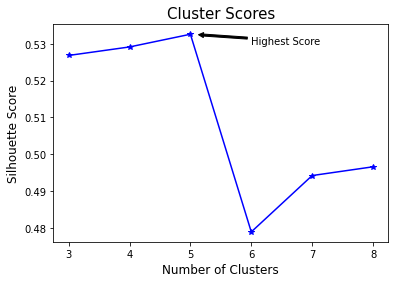

In [47]:
plt.plot(n_clusters, silhouette_scores, color = 'b', marker = '*')
plt.title('Cluster Scores', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 12)
plt.ylabel('Silhouette Score', fontsize = 12)
plt.annotate(text = 'Highest Score', xy = (5.1, 0.5325), xytext = (6, 0.53), arrowprops = {'facecolor':'black', 'arrowstyle':'simple'})
plt.show()

**It is clear from the above graph that the ideal number of clusters for this data is 5.**

<a id='final_model'></a>
### Building the final model with the optimal number of clusters:

In [48]:
final_model = KMeans(n_clusters = 5, random_state = 10)
final_model.fit(scaled_rfm_df)

KMeans(n_clusters=5, random_state=10)

<a id='cluster_exploration'></a>
## Exploring the clusters:

<a id='cluster_assignment'></a>
### Assigning cluster labels to the customers:

In [49]:
data_output = rfm.copy()
data_output['Cluster'] = final_model.labels_
data_output.sample(5)

,customer_unique_id,Recency,Frequency,Monetary,Cluster
13661,261d11f936ebdeae709e01a0ee364cfd,150,1,82.33,0
65442,b6e04915eb0292d96aef4dcc9bc87a90,283,1,168.36,1
38992,6cd4f9f619a196f16b771eaf368838ec,112,1,231.79,0
50492,8d8abfd0d01a9c667c0820bb8c9185a8,233,1,94.84,0
19088,353801f49ab64d5e6ca90ba46e2e5f0f,419,1,133.85,1


<a id='cluster_sizes'></a>
### How many customers are present in each cluster?

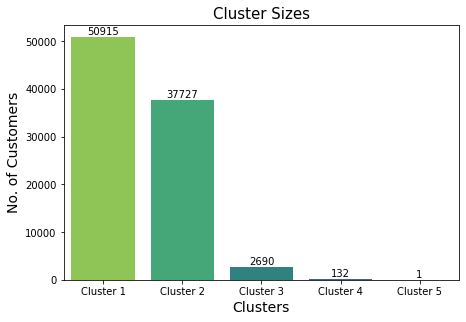

In [50]:
sns.countplot(data = data_output, x = 'Cluster', palette = 'viridis_r')
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 14)
plt.ylabel('No. of Customers', fontsize = 14)
plt.xticks([0, 1, 2, 3, 4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'], rotation = 0)
plt.text(x = 0 - 0.2, y = data_output.Cluster.value_counts()[0] + 500, s = data_output.Cluster.value_counts()[0])
plt.text(x = 1 - 0.2, y = data_output.Cluster.value_counts()[1] + 500, s = data_output.Cluster.value_counts()[1])
plt.text(x = 2 - 0.15, y = data_output.Cluster.value_counts()[2] + 500, s = data_output.Cluster.value_counts()[2])
plt.text(x = 3 - 0.12, y = data_output.Cluster.value_counts()[3] + 500, s = data_output.Cluster.value_counts()[3])
plt.text(x = 4 - 0.05, y = data_output.Cluster.value_counts()[4] + 500, s = data_output.Cluster.value_counts()[4])
plt.tight_layout(pad = -1)
plt.show()

**It is clear that most of the customers are present in clusters 1 and 2. Peculiarly, there's only one customer in the 5th cluster.**

<a id='cluster_monetary'></a>
### What's the average spending of customers in each cluster?

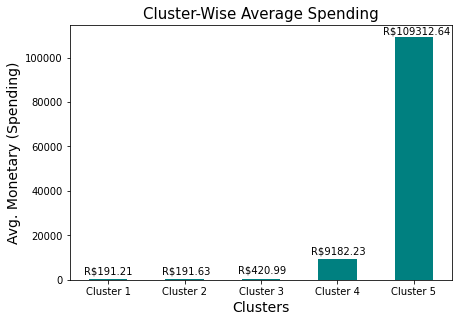

In [51]:
monetary_averages = pd.Series(data_output.groupby(by = 'Cluster')['Monetary'].mean())
monetary_averages.plot(kind = 'bar', color = 'teal')
plt.title('Cluster-Wise Average Spending', fontsize = 15)
plt.xlabel('Clusters', fontsize = 14)
plt.ylabel('Avg. Monetary (Spending)', fontsize = 14)
plt.xticks([0, 1, 2, 3, 4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'], rotation = 0)
plt.text(x = 0 - 0.32, y = monetary_averages[0] + 2500, s = "R${}".format(monetary_averages[0].round(2)))
plt.text(x = 1 - 0.30, y = monetary_averages[1] + 2500, s = "R${}".format(monetary_averages[1].round(2)))
plt.text(x = 2 - 0.30, y = monetary_averages[2] + 2500, s = "R${}".format(monetary_averages[2].round(2)))
plt.text(x = 3 - 0.35, y = monetary_averages[3] + 2500, s = "R${}".format(monetary_averages[3].round(2)))
plt.text(x = 4 - 0.40, y = monetary_averages[4] + 1500, s = "R${}".format(monetary_averages[4].round(2)))
plt.tight_layout(pad = -1)
plt.show()

**The above graph makes it very clear as to why a single customer was given their own cluster. The total spending of this customer is R$109,312.64 (approx ₹16.6L).  
Customers in clusters 1 and 2 spend the least whereas customers from cluster 4 spend significantly higher than the previous clusters.**

<a id='cluster_recency'></a>
### On average, how many days have passed since the customer's last order in each cluster?

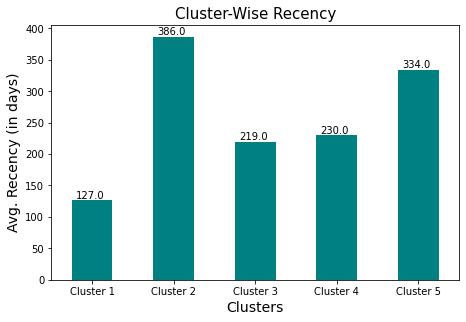

In [52]:
recency_averages = pd.Series(data_output.groupby(by = 'Cluster')['Recency'].mean())
recency_averages.plot(kind = 'bar', color = 'teal')
plt.title('Cluster-Wise Recency', fontsize = 15)
plt.xlabel('Clusters', fontsize = 14)
plt.ylabel('Avg. Recency (in days)', fontsize = 14)
plt.xticks([0, 1, 2, 3, 4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'], rotation = 0)
plt.text(x = 0 - 0.2, y = recency_averages[0] + 3, s = "{}".format(recency_averages[0].round(0)))
plt.text(x = 1 - 0.2, y = recency_averages[1] + 3, s = "{}".format(recency_averages[1].round(0)))
plt.text(x = 2 - 0.2, y = recency_averages[2] + 3, s = "{}".format(recency_averages[2].round(0)))
plt.text(x = 3 - 0.2, y = recency_averages[3] + 3, s = "{}".format(recency_averages[3].round(0)))
plt.text(x = 4 - 0.2, y = recency_averages[4] + 3, s = "{}".format(recency_averages[4].round(0)))
plt.tight_layout(pad = -1)
plt.show()

**Customers in Cluster 1 are the most recent customers whereas it's been more than a year (on avg.) since the previous purchase for customers from cluster 2. For customers from cluster 3 and 4, it's been around 220 and 230 days respectively (on avg.) since their last purchase.**

<a id='cluster_frequency'></a>
### On average, how many orders have the customers placed in each cluster?

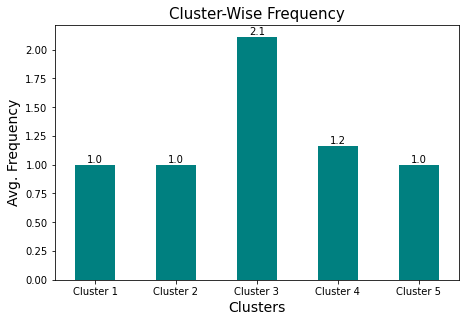

In [53]:
frequency_averages = pd.Series(data_output.groupby(by = 'Cluster')['Frequency'].mean())
frequency_averages.plot(kind = 'bar', color = 'teal')
plt.title('Cluster-Wise Frequency', fontsize = 15)
plt.xlabel('Clusters', fontsize = 14)
plt.ylabel('Avg. Frequency', fontsize = 14)
plt.xticks([0, 1, 2, 3, 4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'], rotation = 0)
plt.text(x = 0 - 0.1, y = frequency_averages[0] + 0.02, s = frequency_averages[0].round(1))
plt.text(x = 1 - 0.1, y = frequency_averages[1] + 0.02, s = frequency_averages[1].round(1))
plt.text(x = 2 - 0.1, y = frequency_averages[2] + 0.02, s = frequency_averages[2].round(1))
plt.text(x = 3 - 0.1, y = frequency_averages[3] + 0.02, s = frequency_averages[3].round(1))
plt.text(x = 4 - 0.1, y = frequency_averages[4] + 0.02, s = frequency_averages[4].round(1))
plt.tight_layout(pad = -1)
plt.show()

**Customers from cluster 3 are the most frequent customers at 2.1 orders per customer whereas all other clusters average around 1 order per customer.**

<a id='aggregate_RFM'></a>
### Aggregating the RFM data:

In [54]:
rfm_agg = data_output.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean', 
    'Monetary': 'mean',
    'Cluster': 'count'
}).round(1)

rfm_agg.rename(columns = {"Recency": "Avg. Recency",
                          "Frequency": "Avg. Frequency",
                          "Monetary": "Avg. Monetary",
                          "Cluster": "Customer Count"
                         }, inplace = True)

rfm_agg

,Avg. Recency,Avg. Frequency,Avg. Monetary,Customer Count
Cluster,,,,
0,126.7,1.0,191.2,50915
1,386.2,1.0,191.6,37727
2,219.2,2.1,421.0,2690
3,229.5,1.2,9182.2,132
4,334.0,1.0,109312.6,1


<a id='cluster_interpretations'></a>
### What does each cluster represent?

**Cluster 0** : This cluster can be interpreted as the ***(Relatively New Customers/Low spenders)*** as their spending is the smallest among all clusters but are the most recent customers. It is the biggest cluster and therefore present the biggest opportunity for the company to increase their customer base. Specialized marketing towards these customers could help increase the company's relevance among them and thereby convert them into loyal, higher spenders.

**Cluster 1** : The customers in this cluster represent failed conversion of Cluster 0 (Relatively New Customers/Low spenders) customers into Cluster 2 (Loyal/Slightly Higher Spenders). This cluster represents the company's customer ***(Churn)***.

**Cluster 2** : This cluster can be interpreted as the ***(Loyal/Slightly Higher Spenders)***. Customers in this cluster have the highest order frequency and slightly higher spending compared to the new customers. Marketing towards these customers should focus on loyalty programs thereby improving retention.

**Cluster 3** : This cluster can be interpreted as the ***(Big Spenders)*** as they spend the most (excluding Cluster 4 (Anomaly)) and are the second most frequent buyers after Cluster 2 (Loyal/Slightly Higher Spenders). Marketing towards these customers should focus on product recommendations as they seem keen on spending high amounts of money thereby driving higher profits.

**Cluster 4** : There is only a single customer in this cluster and they have spent an extremely high amount of money (R$109,312.64) on their order. This cluster can be interpreted as the ***(Anomaly)***.